In [19]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [20]:
#set 나누기.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#1차원 배열을 2차원으로 바꾸기.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k최근접 이웃회귀 모델훈련
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print(knr.predict([[50]]))

[1033.33333333]


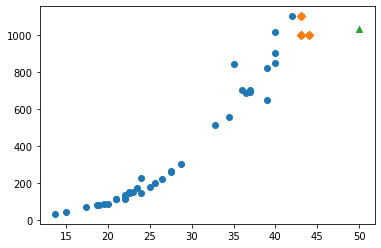

In [23]:
#산점도 표시하기.
import matplotlib.pyplot as plt

#무게가 50인 농어의 이웃구하기. 거리, 인덱스 반환.
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker = '^')
plt.show()

위 표의 결과 50cm의 도미의 무게는 가장가까운 45cm근방의 도미 3개의 평균으로 구해졌다.  이는 틀린 수치이다.  
산점도를 보면 길이가 커질수록 농어의 무게가 증가한다는 것을 알 수 있다. 

In [24]:
#이웃샘플들의 평균을 구해보자.
print(np.mean(train_target[indexes]))

1033.3333333333333


**즉 k-neighbors regressor은 이웃의 샘플들의 평균을 구하는 방법이다.   
따라서 예측하고자 하는 샘플이 train set의 범위에서 벗어난다면 엉뚱한 값을 예측한다.   
길이가 50보다 더 커도 1033.333333...으로 예측될 것이다.**

In [25]:
#길이가 70cm인도미
print(knr.predict([[70]]))

[1033.33333333]


# 선형회귀(Linear Regression)

**선형회귀는 특성이 한개인 경우 어떤 직선을 학습하는 알고리즘이다.**

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형회귀모델훈련
lr.fit(train_input, train_target)

#예측
print(lr.predict([[50]]))

[1241.83860323]


In [27]:
# Y = a*X + b 라는 직선의 방정식을 사용한다.
# X는 길이 Y는 무게이다.
# a와 b는 coef_와 intercept_ 속성에 저장된다.
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


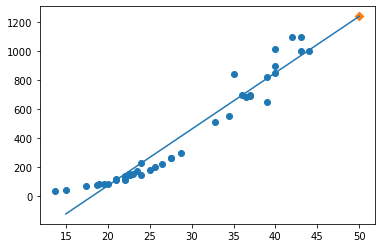

In [28]:

plt.scatter(train_input, train_target)
plt.scatter(50, 50*lr.coef_ + lr.intercept_, marker="D") #50cm인 무게 예측.
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])  #직선의 그래프 그리기.
plt.show()

In [29]:
#회귀에 대한 결정계수 구하기.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.9398463339976041
0.8247503123313559


**결정계수를 보면 train set의 점수가 더 높았다. test set의 점수는 낮다.**

# 다항회귀(Polynomial Regression)

**농어의 길이와 무게에 대한 산점도를 보면 일직선이라기보다 곡선에 가깝다.  
그리고 농어의 길이가 15cm 근처 이하로 내려간다면 무게는 0g 이하로 내려갈 것인데 이는 말이 안된다.   
그렇다면 최적의 직선을 찾기보다는 최적의 곡선을 찾는 방법인, 다항회귀 방법에 대해 알아보자.**   
   
다항회귀는 **Y = a\*X^2 + b\*X + C** 곡선의 방정식을 이용한다.

In [30]:
#이를 위해 길이를 제곱한 항을 데이터 set에 추가해 준다.
train_input2 = np.column_stack((train_input**2, train_input))
test_input2 = np.column_stack((test_input**2, test_input))

In [31]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [33]:
#제곱된 데이터가 포함된 set을 사용해 선형회귀 모델을 다시 훈련한다.
lr = LinearRegression()
lr.fit(train_input2, train_target)

#predict할때에는 길이의 제곱값과, 길이의 값둘다 넣어줘야 한다.
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [37]:
#곡선의 방정식 a, b, c구하기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


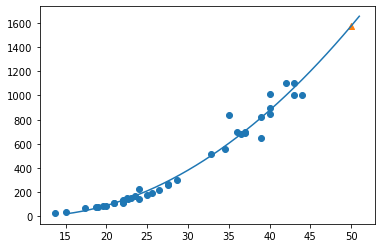

In [41]:
#산점도 그리기.
point = np.arange(15,52) #구간별 직선을 그리기 위해 정수 배열을 만든다.

plt.scatter(train_input, train_target)

plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

plt.scatter([50], [1574], marker="^")
plt.show()

In [42]:
#결정계수 평가하기.
print(lr.score(train_input2,train_target))
print(lr.score(test_input2,test_target))

0.9706807451768623
0.9775935108325121
